In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('/content/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.shape

(600, 6)

In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [7]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
new_df = pd.DataFrame(df)
new_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## visualization

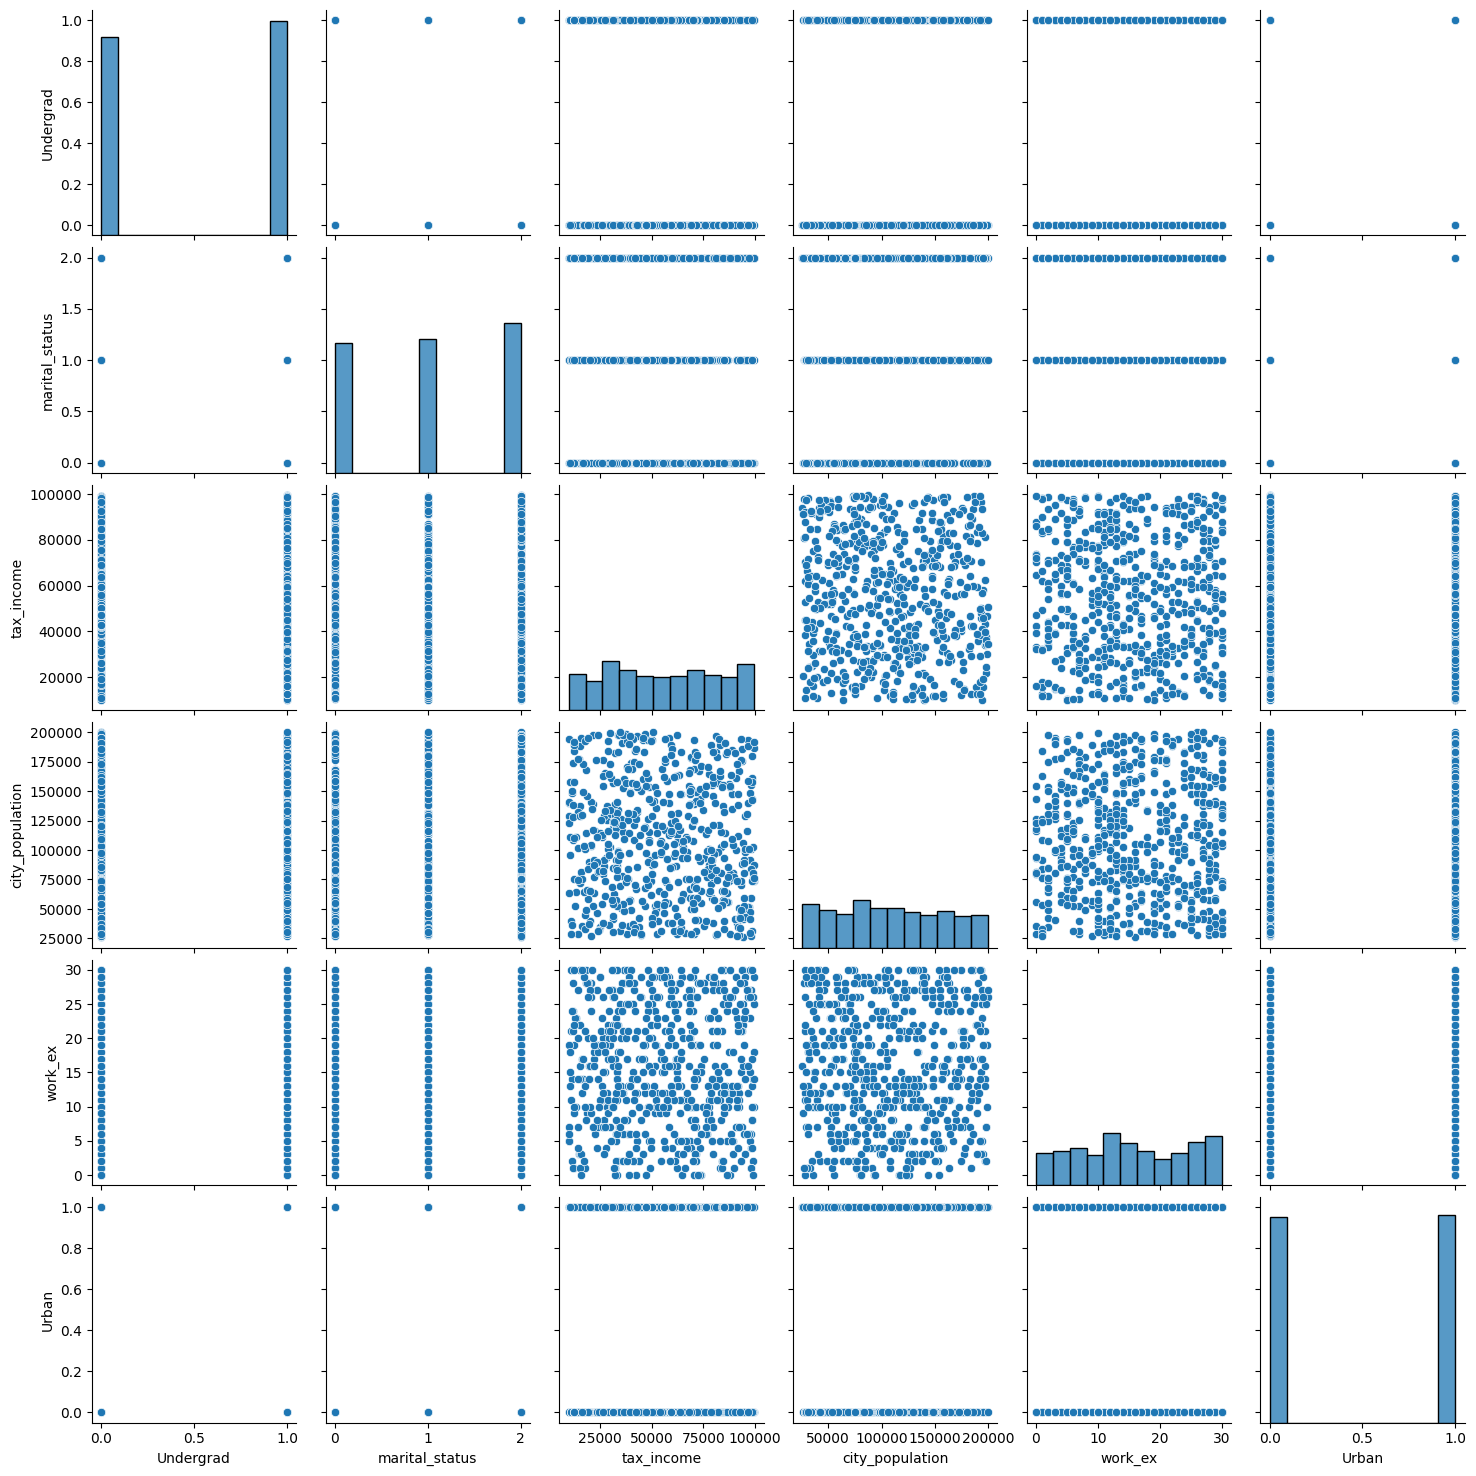

In [40]:
# pairplot
import seaborn as sns
sns.pairplot(new_df)

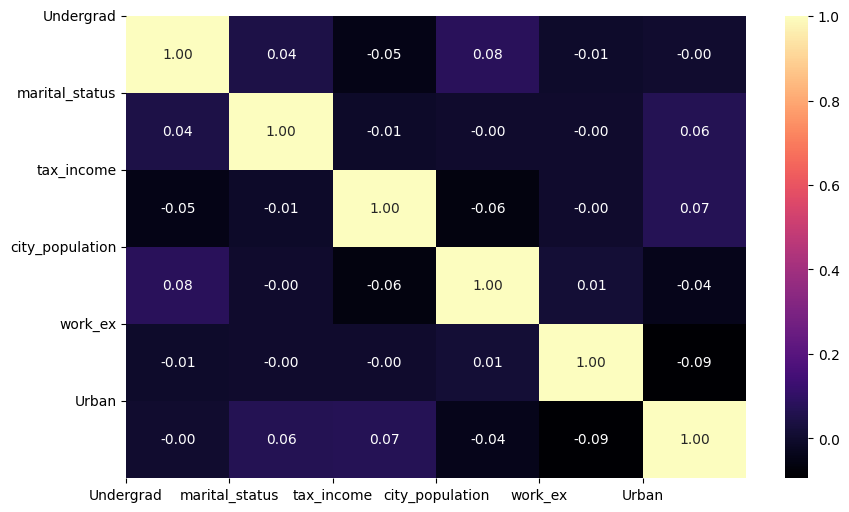

In [42]:
corr = new_df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [9]:
data = new_df.rename(columns= {"Marital.Status" : "marital_status", "Taxable.Income" : "tax_income", "City.Population" : "city_population",
         "Work.Experience" : "work_ex"}, inplace = True)

In [10]:
data

In [11]:
new_df["tax_status"] = np.where(new_df['tax_income']<=30000,'Risky','Good')
new_df.head()

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [12]:
new_df.tax_status.unique()

array(['Good', 'Risky'], dtype=object)

In [13]:
df.drop(['tax_income', 'city_population'], axis=1, inplace= True)
new_df

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban,tax_status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label = LabelEncoder()

In [16]:
new_df['Undergrad']= label.fit_transform(new_df['Undergrad'])
new_df['marital_status']= label.fit_transform(new_df['marital_status'])
new_df['Urban']= label.fit_transform(new_df['Urban'])

In [17]:
new_df.head()

,Undergrad,marital_status,tax_income,city_population,work_ex,Urban,tax_status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int64 
 1   marital_status   600 non-null    int64 
 2   tax_income       600 non-null    int64 
 3   city_population  600 non-null    int64 
 4   work_ex          600 non-null    int64 
 5   Urban            600 non-null    int64 
 6   tax_status       600 non-null    object
dtypes: int64(6), object(1)
memory usage: 32.9+ KB


In [19]:
x= new_df.iloc[:,:4]
x

,Undergrad,marital_status,tax_income,city_population
0,0,2,68833,50047
1,1,0,33700,134075
2,0,1,36925,160205
3,1,2,50190,193264
4,0,1,81002,27533
...,...,...,...,...
595,1,0,76340,39492
596,1,0,69967,55369
597,0,0,47334,154058
598,1,1,98592,180083


In [20]:
y = new_df.iloc[:,-1]
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_status, Length: 600, dtype: object

In [21]:
new_df.tax_status.value_counts()

Good     476
Risky    124
Name: tax_status, dtype: int64

### Building Decision Tree Classifier using Entropy Criteria

In [22]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [23]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
model.get_n_leaves()

2

In [25]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Good     92
Risky    28
dtype: int64

In [26]:
np.mean(preds==y_test)

1.0

##### Visualize

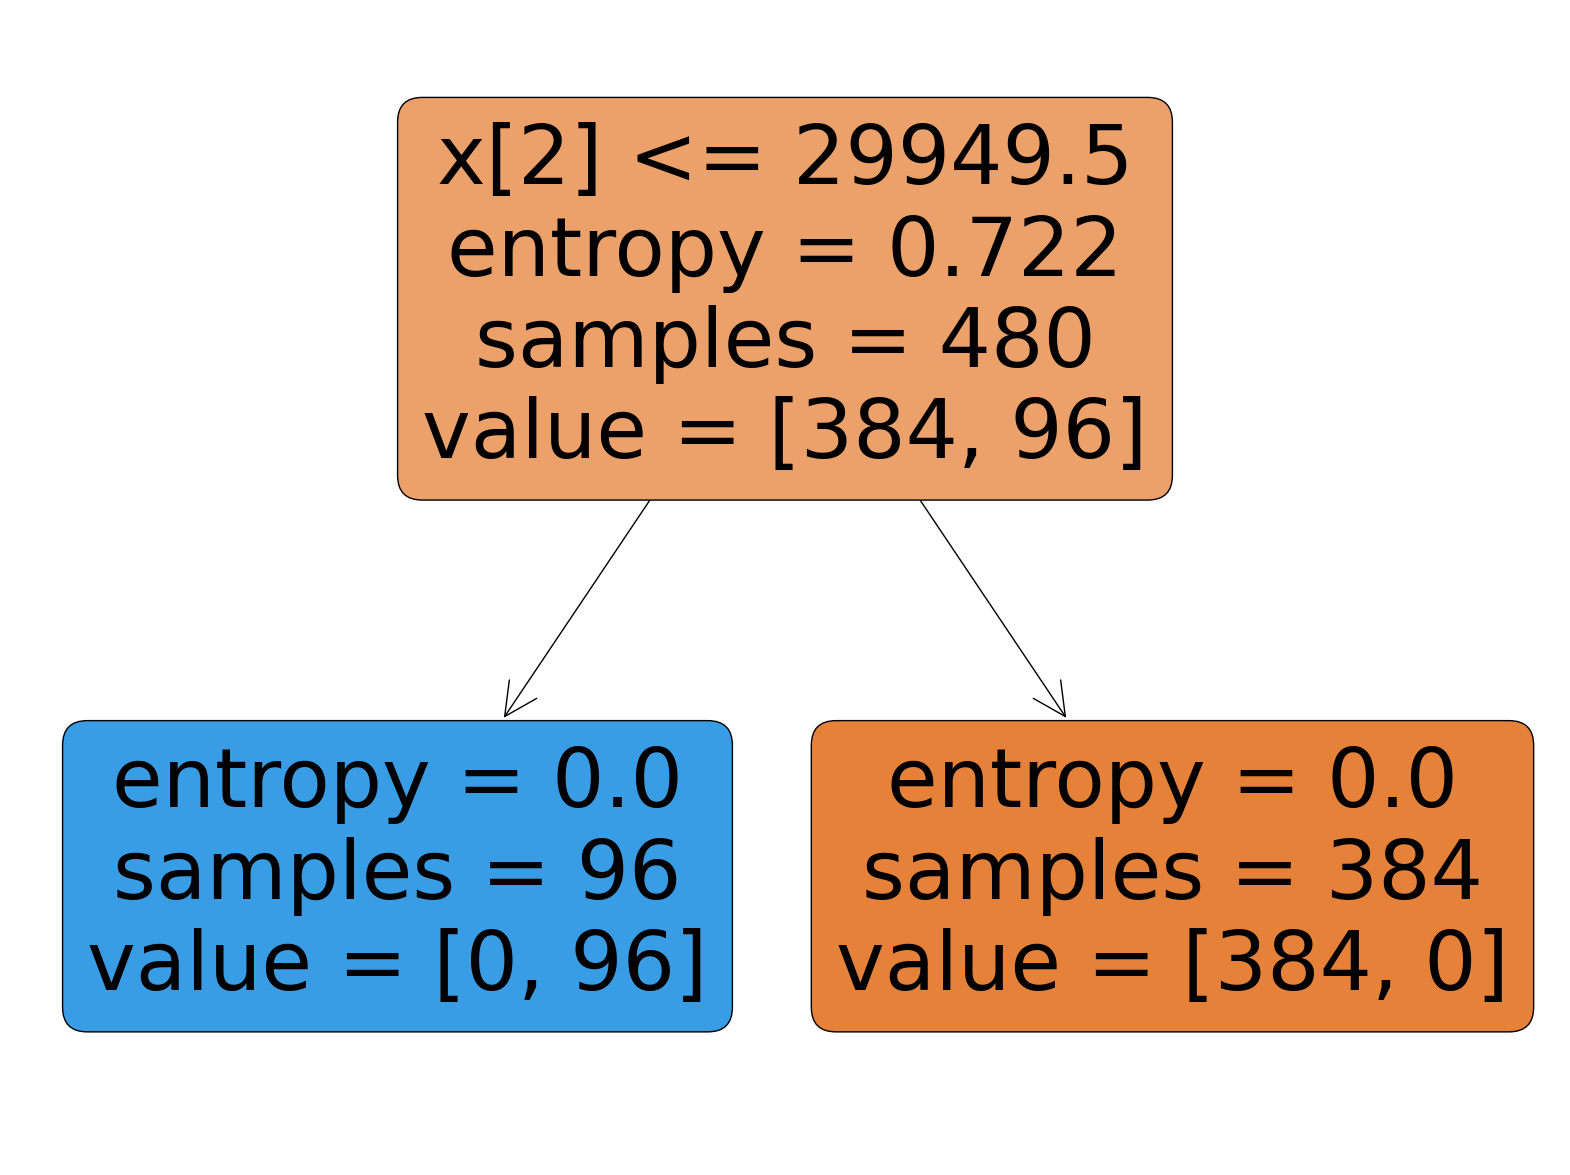

In [27]:
import matplotlib.pyplot as plt
# Prepare a plot figure with set size.
plt.figure(figsize = (20,15))
# Plot the decision tree.
plot_tree(model,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()

In [28]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
tax_status,,
Good,92,0
Risky,0,28


In [29]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        92
       Risky       1.00      1.00      1.00        28

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## Building Decision Tree Classifier using Gini Criteria

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

1.0

In [33]:
model_gini.get_n_leaves()

2

In [34]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        92
       Risky       1.00      1.00      1.00        28

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



### Visualize

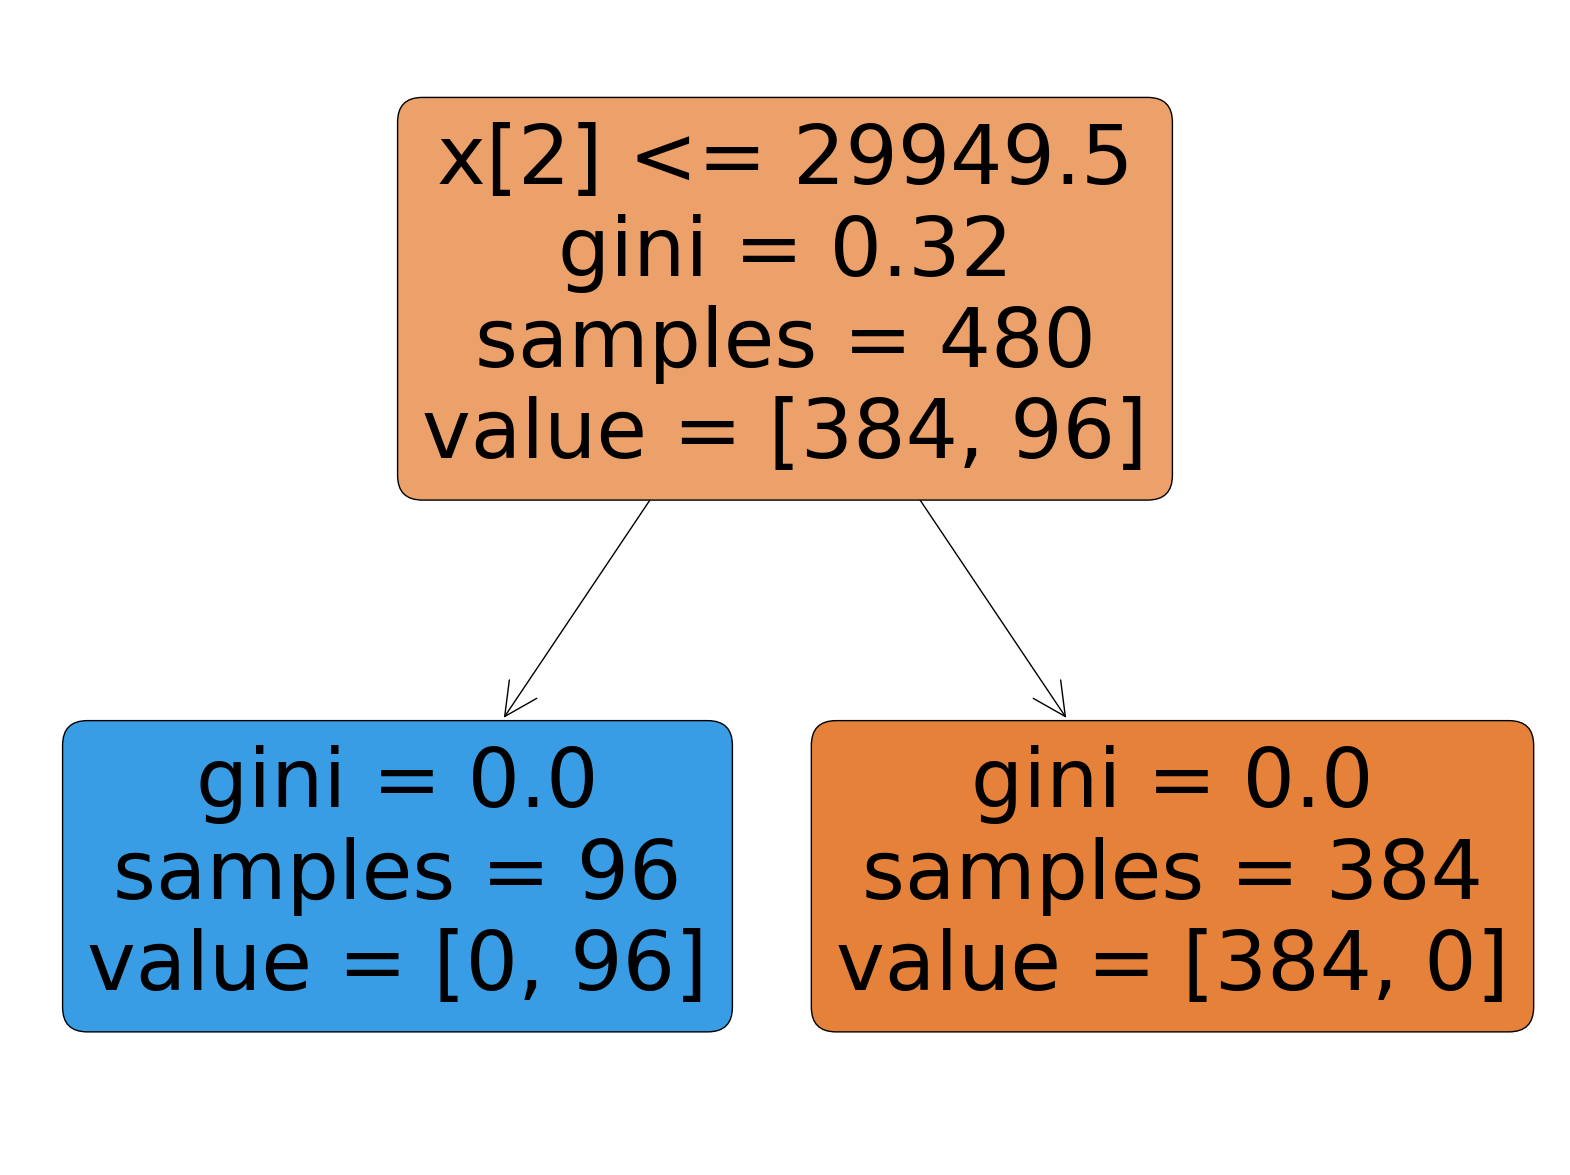

In [35]:
import matplotlib.pyplot as plt
# Prepare a plot figure with set size.
plt.figure(figsize = (20,15))
# Plot the decision tree.
plot_tree(model_gini,rounded = True,filled = True)
# Display the tree plot figure.
plt.show()